In [1]:
import numpy as np
import pandas as pd
from google.colab import files
import io
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['lab2_python.csv']))

Saving lab2_python.csv to lab2_python.csv


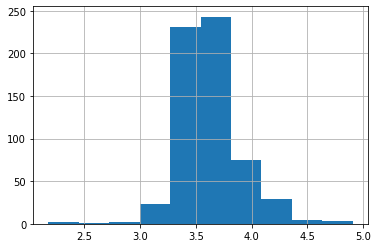

In [2]:
np.log10(data['ApplicantIncome']).hist()

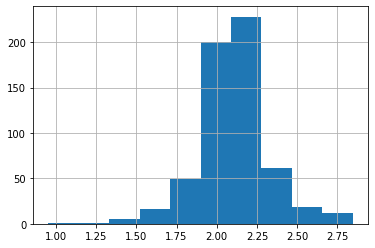

In [3]:
np.log10(data['LoanAmount']).hist()

In [4]:
data['ApplicantIncome'] = np.log10(data['ApplicantIncome'])
data['LoanAmount'] = np.log10(data['LoanAmount'])

In [17]:
raw_data = pd.get_dummies(data.drop(columns=['Married','Self_Employed','Loan_ID', 'Loan_Amount_Term', 'CoapplicantIncome','Dependents']), 
               columns=['Gender','Education', 'Property_Area', 'Loan_Status'])

In [18]:
raw_data.columns

Index(['ApplicantIncome', 'LoanAmount', 'Credit_History', 'Gender_Female',
       'Gender_Male', 'Education_Graduate', 'Education_Not Graduate',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_N', 'Loan_Status_Y'],
      dtype='object')

In [19]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
imputer = KNNImputer(n_neighbors=10)

X = scaler.fit_transform(imputer.fit_transform(raw_data))

In [20]:
X.shape

(614, 12)

In [21]:
X_mini = X[:, [0, 3]]
X_mini

array([[ 0.51619904, -0.47234264],
       [ 0.13787935, -0.47234264],
       [-0.51935169, -0.47234264],
       ...,
       [ 1.0158296 , -0.47234264],
       [ 0.91890274, -0.47234264],
       [ 0.13787935,  2.11710719]])

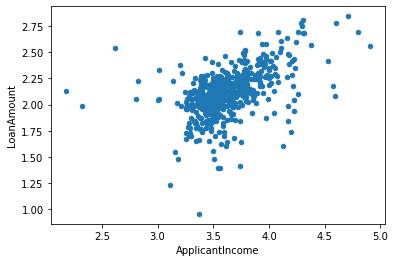

In [33]:
data.plot.scatter(x='ApplicantIncome', y='LoanAmount')

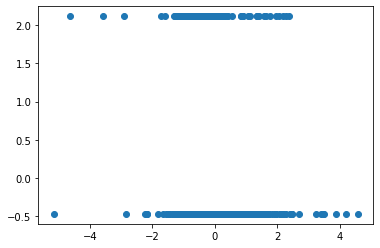

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(X_mini[:, 0], X_mini[:, 1])

## KMeans

In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_mini)

In [36]:
kmeans.predict(X_mini)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [37]:
sum(kmeans.labels_)

502

In [38]:
kmeans.cluster_centers_

array([[-0.17892571,  2.11710719],
       [ 0.03991968, -0.47234264]])

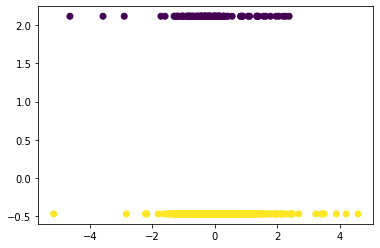

In [39]:
plt.scatter(X_mini[:, 0], X_mini[:, 1], c=kmeans.labels_)

In [40]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(X_mini)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X_mini, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

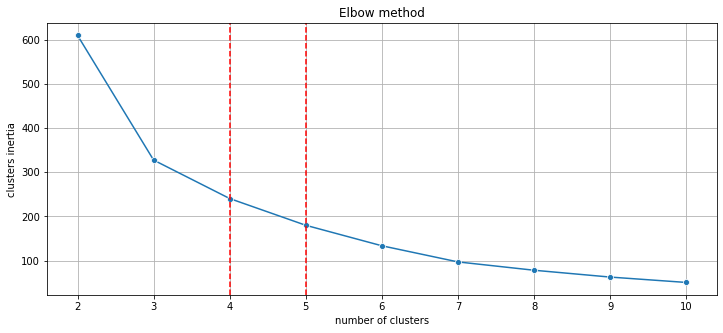

In [41]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x = n_clusters, y = clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(4, ls="--", c="red")
ax.axvline(5, ls="--", c="red")
plt.grid()
plt.show()

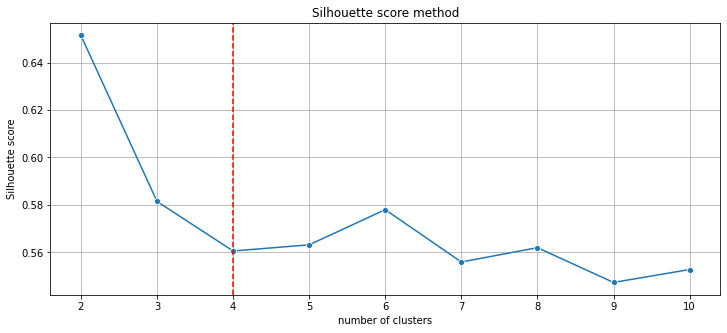

In [42]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x = n_clusters, y = s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(4, ls="--", c="red")
plt.grid()
plt.show()

## Affinity Propagation

In [45]:
from sklearn.cluster import AffinityPropagation

In [46]:
AF = AffinityPropagation(preference=-50, max_iter=200).fit(X_mini)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_affinity_propagation.py:250: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn(


In [47]:
AF.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

## Mean Shift

In [48]:
from sklearn.cluster import MeanShift

clustering = MeanShift(bandwidth=0.2).fit(X_mini)
clustering.labels_

clustering.predict(X_mini)

clustering

MeanShift(bandwidth=0.2)

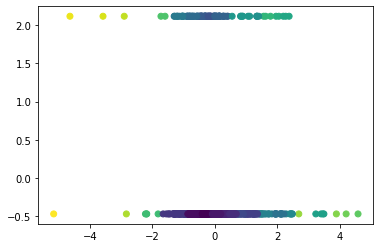

In [49]:
plt.scatter(X_mini[:, 0], X_mini[:, 1], c = clustering.labels_)
plt.show()

## Spectral clustering

In [52]:
from sklearn.cluster import SpectralClustering

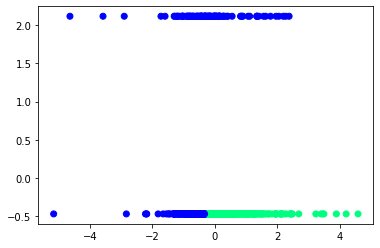

In [53]:
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') 
  
labels_nn = spectral_model_nn.fit_predict(X_mini)

plt.scatter(X_mini[:, 0], X_mini[:, 1],  
           c = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors').fit_predict(X_mini), cmap =plt.cm.winter) 
plt.show() 

## Hierarchical clustering

In [54]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

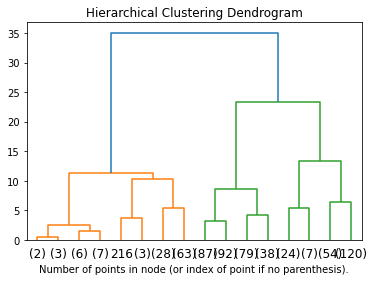

In [55]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X_mini)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

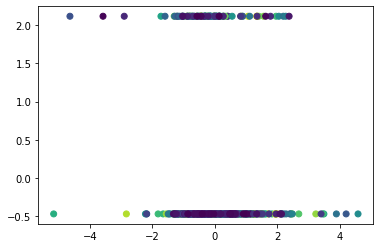

In [56]:
plt.scatter(X_mini[:, 0], X_mini[:, 1], c=model.labels_)
plt.show()

## DBSCAN

In [64]:
from sklearn.cluster import DBSCAN

In [65]:
from itertools import product

eps_values = np.arange(0.9, 1.25, 0.05) # eps values to be investigated
min_samples = np.arange(1, 4, 1) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_mini)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_mini, DBS_clustering.labels_))

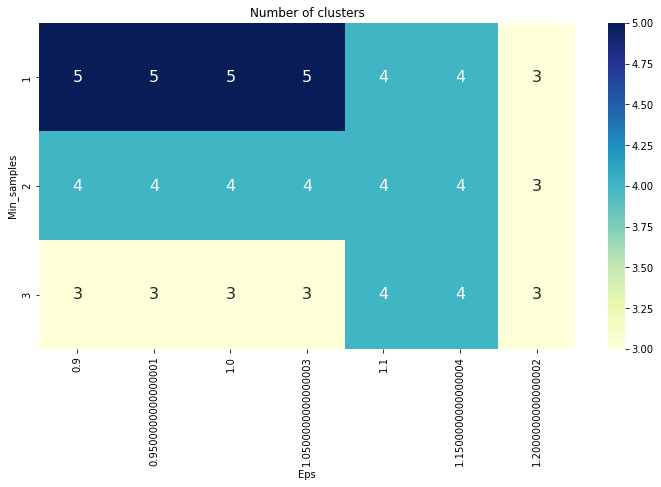

In [66]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

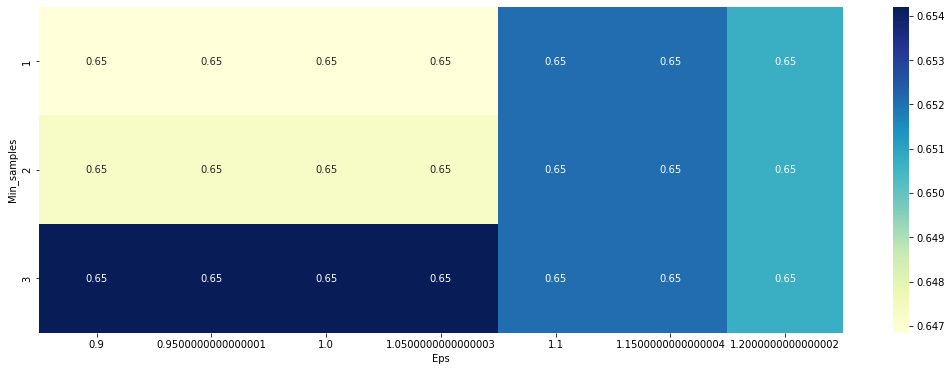

In [67]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [68]:
DBS_clustering = DBSCAN(eps=1.01, min_samples=2).fit(X_mini)

DBSCAN_clustered = pd.DataFrame(X_mini)
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,2
0,501
1,109
2,2


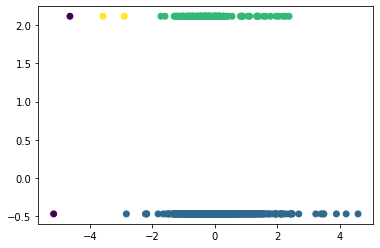

In [69]:
plt.scatter(X_mini[:, 0], X_mini[:, 1], c=DBS_clustering.labels_)
plt.show()